<a href="https://colab.research.google.com/github/MandilKarki/Diffusion-Models/blob/main/amused_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install diffusers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.6 MB/s eta 0:00:00


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

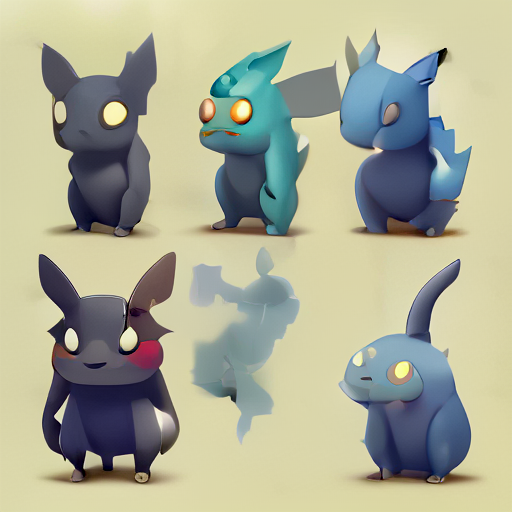

In [5]:
import torch
from diffusers import AmusedPipeline

pipe = AmusedPipeline.from_pretrained(
    "amused/amused-512", variant="fp16", torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

prompt = "A pokemon evolution and it showing the nature of evaluation of life and how monsters are connetced in the realm of nature"
negative_prompt = "High quality, beautiful"

image = pipe(prompt, negative_prompt=negative_prompt, generator=torch.manual_seed(0)).images[0]
image


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

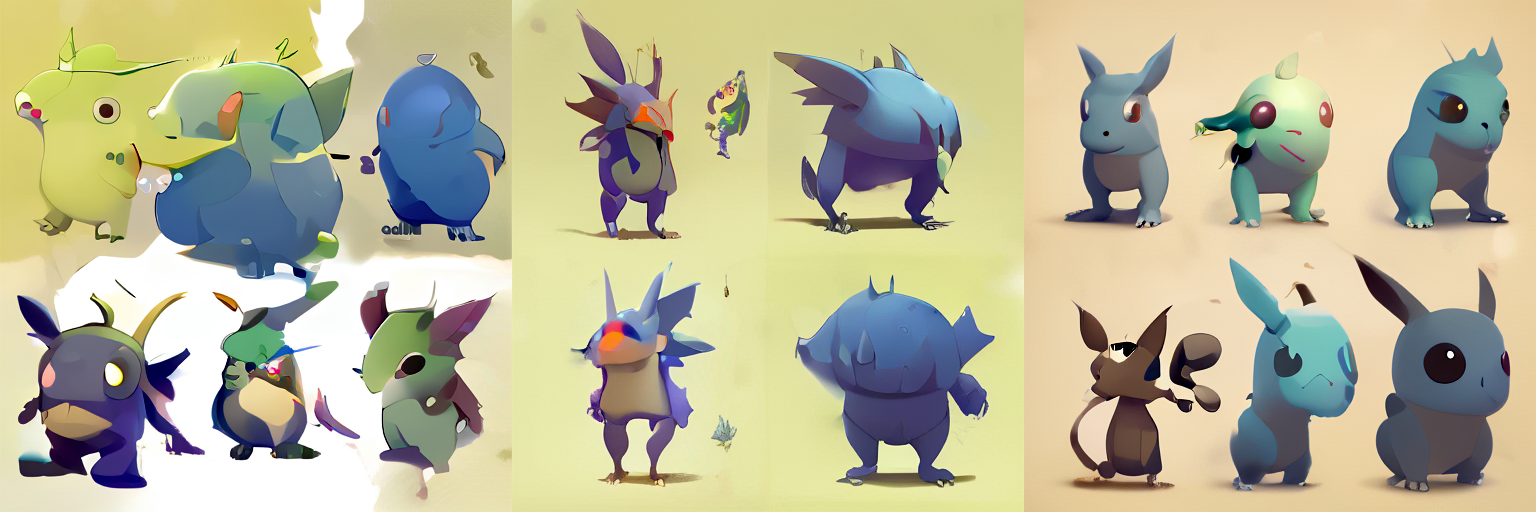

In [6]:
from diffusers.utils import make_image_grid

images = []
for step in [5, 10, 15]:
    image = pipe(prompt, negative_prompt=negative_prompt, num_inference_steps=step, generator=torch.manual_seed(0)).images[0]
    images.append(image)

grid = make_image_grid(images, rows=1, cols=3)
grid
